In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from src.loading import get_dataset_and_order_function
from src.execution import compute_cuts, compute_tangles, order_cuts, compute_clusters, compute_evaluation
from src.config import load_validate_settings, VALID_PREPROCESSING

args = load_validate_settings('./')
# args.dataset.name = 'knn'

print("Load data\n", flush=True)
xs, ys, G, order_function = get_dataset_and_order_function(args.dataset, args.seed)
nx.is_connected(G)

Load data



True

In [2]:
cuts = dict()
orders = dict()

names = ['kneip', 'local_min_bounded', 'local_min', 'kernighan_lin',]
for name in names:
    print(f"Find cuts using {name}", flush=True)
    if name == 'kernighan_lin':
        args.preprocessing.name = ['karnig_lin']
    else:
        args.preprocessing.name = [name]
    all_cuts = compute_cuts(xs.copy(), args.preprocessing)
    
    print("Compute order", flush=True)
    all_cuts, all_orders = order_cuts(all_cuts, order_function)
    
    max_order = np.int(np.ceil(np.max(all_orders)))
    min_order = np.int(np.floor(np.min(all_orders)))
    print(f"\tOrder range: {min_order}--{max_order} \n", flush=True)
    
    cuts[name] = all_cuts
    orders[name] = all_orders

Find cuts using kneip
kneip
		 I've found 22 cuts so far
		 I've found 45 cuts so far
		 I've found 69 cuts so far
		 I've found 88 cuts so far
		 I've found 105 cuts so far
		 I've found 135 cuts so far
		 I've found 159 cuts so far
		 I've found 182 cuts so far
		 I've found 200 cuts so far
		 I've found 217 cuts so far
		 I've found 237 cuts so far
		 I've found 261 cuts so far
		 I've found 282 cuts so far
		 I've found 298 cuts so far
		 I've found 311 cuts so far
		 I've found 333 cuts so far
		 I've found 362 cuts so far
		 I've found 378 cuts so far
		 I've found 399 cuts so far
		 I've found 420 cuts so far
		 I've found 440 cuts so far
		 I've found 453 cuts so far
		 I've found 474 cuts so far
		 I've found 497 cuts so far
		 I've found 516 cuts so far
Compute order
	Order range: 7--1137 

Find cuts using local_min_bounded
local_min_bounded
Compute order
	Order range: 30--880 

Find cuts using local_min
local_min
Compute order
	Order range: 0--518 

Find cuts using karnig_li

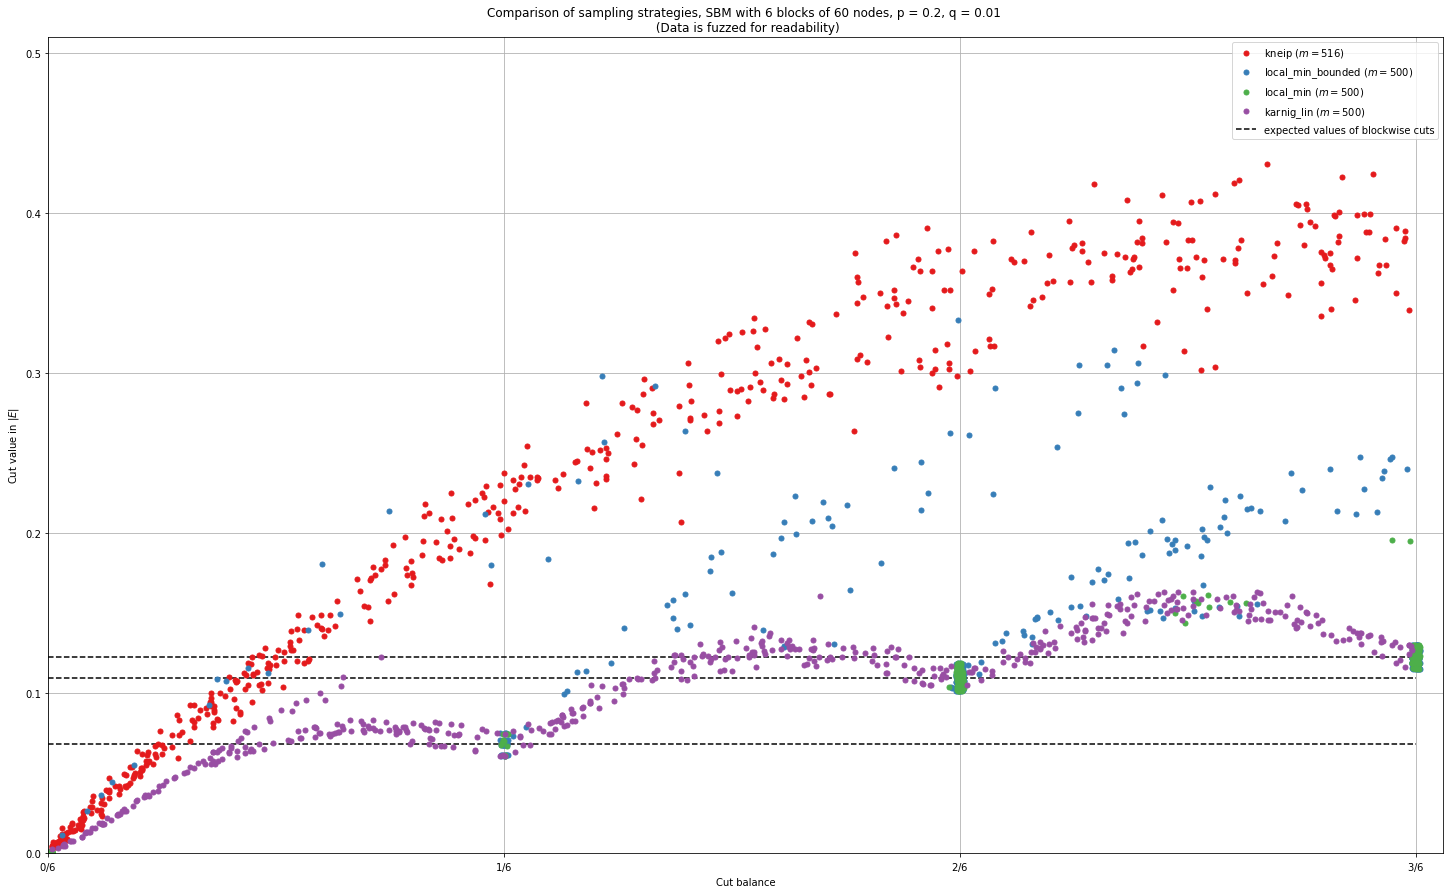

In [3]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(25,15))
cmap = plt.cm.get_cmap('Set1')

for i, name in enumerate(names):
    balance = 0.5 - np.abs(cuts[name].sum(axis=1) / len(G) - 0.5)
    order = orders[name] / len(G.edges)
    xfuzz = (np.random.rand(*balance.shape) - .5) * (1 / len(G))
    yfuzz = (np.random.rand(*balance.shape) - .5) * 0.001
    
    color = np.array(cmap(i))
    
    ax.plot(balance + xfuzz, order + yfuzz, marker='.', ms=10, linestyle='', label=f'{name} ($m={len(order)}$)', color=color)
ax.set(xlabel='Cut balance', ylabel='Cut value in $|E|$')

N = len(G)
nb, p, q = args.dataset.sbm.nb_blocks, args.dataset.sbm.p, args.dataset.sbm.q

ax.hlines([(i*N/nb) * (N - i*N/nb) * q / len(G.edges) for i in range(1, 1 + nb//2)], 0, 0.5, linestyles='dashed', label='expected values of blockwise cuts')

plt.setp(ax, xticks=[i / nb for i in range(1 + nb // 2)] + ([0.5] if nb % 2 == 1 else []),
        xticklabels=[f'${i}/{nb}$' for i in range(1 + nb // 2)] + (['1/2'] if nb % 2 == 1 else []),
        xlim=(0, 0.51), ylim=(0,0.51))

ax.grid(True)
ax.legend()
if args.dataset.name == 'sbm':
    ax.set_title(f'Comparison of sampling strategies, SBM with {nb} blocks of {N//nb} nodes, p = {p}, q = {q} \n (Data is fuzzed for readability)')
    fig.savefig(f'sampling/sbm{nb}blocks{N}nodes{p}p{q}q.png')
plt.show(fig)

1

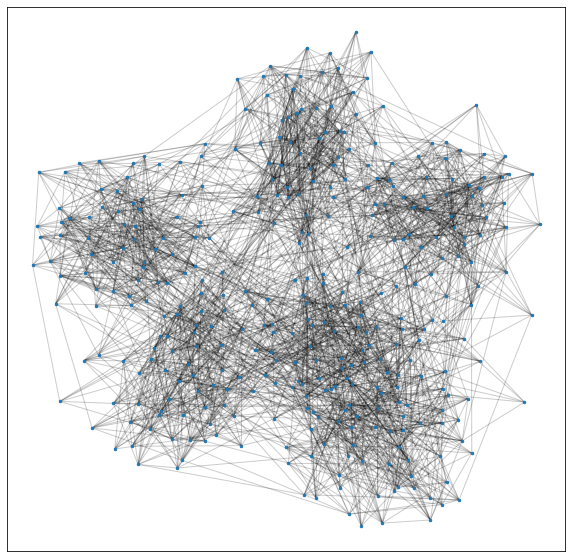

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

pos = nx.spectral_layout(G)
pos = nx.spring_layout(G, pos=pos)
nx.draw_networkx(G, pos=pos, node_size=6, ax=ax, edge_color='#00000033', labels={})
len(list(nx.connected_components(G)))